#Importing Important Modules

In [ ]:
%%capture
!pip install mne
!pip install pymatreader
!pip install --upgrade yasa
!pip install mat73
!pip install pywt


In [ ]:
import mne
import pywt
import numpy as np
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from mat73 import loadmat

import pickle

from sklearn.utils import shuffle
from scipy import signal
from scipy.fft import fftshift
from mne.time_frequency import psd_array_multitaper
from scipy.integrate import simps
from yasa import sliding_window

import tensorflow as tf
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, activations

Connecting to the google drive using authentication procees and getting the raw data from the drive.

In [ ]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


In [ ]:
cd /drive/MyDrive/Computational Neuroscience/PD_Data/Patient_ses_off

/drive/MyDrive/Computational Neuroscience/PD_Data/Patient_ses_off


In [ ]:
ls

sub-pd11_ses-off_task-rest_eeg.bdf  sub-pd23_ses-off_task-rest_eeg.bdf
sub-pd12_ses-off_task-rest_eeg.bdf  sub-pd26_ses-off_task-rest_eeg.bdf
sub-pd13_ses-off_task-rest_eeg.bdf  sub-pd28_ses-off_task-rest_eeg.bdf
sub-pd14_ses-off_task-rest_eeg.bdf  sub-pd3_ses-off_task-rest_eeg.bdf
sub-pd16_ses-off_task-rest_eeg.bdf  sub-pd5_ses-off_task-rest_eeg.bdf
sub-pd17_ses-off_task-rest_eeg.bdf  sub-pd6_ses-off_task-rest_eeg.bdf
sub-pd19_ses-off_task-rest_eeg.bdf  sub-pd9_ses-off_task-rest_eeg.bdf
sub-pd22_ses-off_task-rest_eeg.bdf


In [ ]:
pd_off_raw_data = glob.glob('*.bdf')
pd_off_raw_data.sort()
len(pd_off_raw_data), pd_off_raw_data

(15,
 ['sub-pd11_ses-off_task-rest_eeg.bdf',
  'sub-pd12_ses-off_task-rest_eeg.bdf',
  'sub-pd13_ses-off_task-rest_eeg.bdf',
  'sub-pd14_ses-off_task-rest_eeg.bdf',
  'sub-pd16_ses-off_task-rest_eeg.bdf',
  'sub-pd17_ses-off_task-rest_eeg.bdf',
  'sub-pd19_ses-off_task-rest_eeg.bdf',
  'sub-pd22_ses-off_task-rest_eeg.bdf',
  'sub-pd23_ses-off_task-rest_eeg.bdf',
  'sub-pd26_ses-off_task-rest_eeg.bdf',
  'sub-pd28_ses-off_task-rest_eeg.bdf',
  'sub-pd3_ses-off_task-rest_eeg.bdf',
  'sub-pd5_ses-off_task-rest_eeg.bdf',
  'sub-pd6_ses-off_task-rest_eeg.bdf',
  'sub-pd9_ses-off_task-rest_eeg.bdf'])

In [ ]:
cd /drive/MyDrive/Computational Neuroscience/PD_Data/Patient_ses_on

/drive/MyDrive/Computational Neuroscience/PD_Data/Patient_ses_on


In [ ]:
ls

sub-pd11_ses-off_task-rest_eeg.bdf  sub-pd23_ses-off_task-rest_eeg.bdf
sub-pd12_ses-off_task-rest_eeg.bdf  sub-pd26_ses-off_task-rest_eeg.bdf
sub-pd13_ses-off_task-rest_eeg.bdf  sub-pd28_ses-off_task-rest_eeg.bdf
sub-pd14_ses-off_task-rest_eeg.bdf  sub-pd3_ses-off_task-rest_eeg.bdf
sub-pd16_ses-off_task-rest_eeg.bdf  sub-pd5_ses-off_task-rest_eeg.bdf
sub-pd17_ses-off_task-rest_eeg.bdf  sub-pd6_ses-off_task-rest_eeg.bdf
sub-pd19_ses-off_task-rest_eeg.bdf  sub-pd9_ses-off_task-rest_eeg.bdf
sub-pd22_ses-off_task-rest_eeg.bdf


In [ ]:
pd_on_raw_data = glob.glob('*.bdf')
pd_on_raw_data.sort()
len(pd_on_raw_data), pd_on_raw_data

(15,
 ['sub-pd11_ses-off_task-rest_eeg.bdf',
  'sub-pd12_ses-off_task-rest_eeg.bdf',
  'sub-pd13_ses-off_task-rest_eeg.bdf',
  'sub-pd14_ses-off_task-rest_eeg.bdf',
  'sub-pd16_ses-off_task-rest_eeg.bdf',
  'sub-pd17_ses-off_task-rest_eeg.bdf',
  'sub-pd19_ses-off_task-rest_eeg.bdf',
  'sub-pd22_ses-off_task-rest_eeg.bdf',
  'sub-pd23_ses-off_task-rest_eeg.bdf',
  'sub-pd26_ses-off_task-rest_eeg.bdf',
  'sub-pd28_ses-off_task-rest_eeg.bdf',
  'sub-pd3_ses-off_task-rest_eeg.bdf',
  'sub-pd5_ses-off_task-rest_eeg.bdf',
  'sub-pd6_ses-off_task-rest_eeg.bdf',
  'sub-pd9_ses-off_task-rest_eeg.bdf'])

In [ ]:
%%capture
!pip install pyedflib

In [ ]:
healthy_df.columns

Index(['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7',
       'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2',
       'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1',
       'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status',
       'label'],
      dtype='object')

In [ ]:
print(pd_df.iloc[0])

Fp1      -20397.509186
AF3      -16635.391138
F7        -8542.031092
F3        -9470.154377
FC1       -6611.878409
FC5       -7684.095178
T7       -11470.275682
C3        -1492.512868
CP1       -3809.571087
CP5       -2007.480667
P7        -6320.816447
P3        -1797.449805
Pz        -1796.762306
PO3       -4525.038515
O1        -3432.165534
Oz        -6059.879429
O2        -7068.471315
PO4      -14497.426338
P4        -8444.406273
P8        -7600.720332
CP6       -1655.137568
CP2       -3972.508286
C4        -3136.353581
T8       -10373.058959
FC6       -1057.701172
FC2      -12593.492356
F4         -7877.40732
F8        -8866.436743
AF4      -14762.738348
Fp2      -15682.330399
Fz        -7067.721317
Cz        -3463.696726
EXG1      -19757.04162
EXG2     -16164.642008
EXG3      -9394.779517
EXG4     -12110.118249
EXG5     -28383.994429
EXG6     -23684.003114
EXG7     -35330.575344
EXG8     -26271.498333
Status      -6750208.0
label          class 1
Name: 0, dtype: object


In [ ]:
combined_df

,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,CP5,...,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Status,label
0,-18559.012584,-16599.141205,-12191.493099,-26431.310538,-15338.362285,-12289.242919,-4845.881672,-14554.769982,-12074.962064,-9059.248887,...,-20939.601935,-19126.480285,-17629.670551,-12464.836344,-21872.100212,-12210.149315,-22641.911289,-27176.559161,-6750208.0,class 0
1,-18558.575084,-16597.609958,-12188.555605,-26438.248025,-15341.518529,-12290.117917,-4842.725428,-14556.676229,-12076.774561,-9060.530134,...,-20937.258189,-19129.167780,-17624.670560,-12459.930103,-21880.631446,-12218.461799,-22657.880010,-27193.152880,-6750208.0,class 0
2,-18550.387599,-16591.391219,-12185.243111,-26440.654270,-15342.143528,-12288.930419,-4841.069181,-14556.488729,-12076.587061,-9057.467640,...,-20934.914443,-19128.355282,-17611.483084,-12453.117616,-21879.662698,-12217.024302,-22620.223829,-27159.402942,-6750208.0,class 0
3,-18549.137602,-16589.766222,-12187.118107,-26439.560522,-15340.956030,-12286.149174,-4838.912935,-14552.363737,-12074.618315,-9053.655147,...,-20925.476961,-19124.199039,-17609.639338,-12452.805116,-21875.412706,-12211.305563,-22609.036350,-27148.559212,-6750208.0,class 0
4,-18549.637601,-16588.672474,-12183.399364,-26432.216786,-15338.268535,-12282.430431,-4835.069192,-14546.457498,-12072.524569,-9049.311405,...,-20917.851975,-19123.949040,-17608.670590,-12451.711368,-21870.568965,-12206.274322,-22602.005113,-27142.121724,-6750208.0,class 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071483,-14168.239447,-1670.793789,-5117.631170,2777.072993,-3503.040403,2911.947744,-9229.686072,1551.544007,-308.983805,-1674.856281,...,-3537.384090,-13685.396589,-4542.350983,-9949.434742,-19255.323797,-11302.744741,-24153.408497,-19641.948083,-6815744.0,class 1
3071484,-14206.958125,-1666.543797,-5121.381163,2776.635494,-3502.040405,2913.135241,-9220.873588,1552.637755,-306.983809,-1681.825018,...,-3517.602876,-13698.146565,-4465.194875,-9968.559707,-19297.792468,-11344.557164,-24112.564822,-19600.541909,-6815744.0,class 1
3071485,-14274.145501,-1645.200086,-5124.849906,2756.198031,-3504.634150,2912.572742,-9227.623576,1553.387754,-305.140062,-1678.668774,...,-3506.040398,-13703.771555,-4457.569889,-9980.153435,-19333.261153,-11381.494596,-24130.096040,-19617.854377,-6815744.0,class 1
3071486,-14275.082999,-1640.168845,-5124.037408,2755.854282,-3503.821652,2913.916490,-9239.686053,1555.544000,-303.577565,-1665.668798,...,-3513.665384,-13704.552803,-4484.788589,-9977.465940,-19374.198577,-11423.338268,-24166.970971,-19652.073064,-6815744.0,class 1


In [ ]:
cd /drive/MyDrive/Computational Neuroscience/PD_Data/Healthy

/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy


In [ ]:
ls


dataframe_raw_df.csv                sub-pd14_ses-off_task-rest_eeg.bdf
processed_data.fif                  sub-pd14_ses-on_task-rest_eeg.bdf
sub-hc10_ses-hc_task-rest_eeg.bdf   sub-pd16_ses-off_task-rest_eeg.bdf
sub-hc18_ses-hc_task-rest_eeg.bdf   sub-pd16_ses-on_task-rest_eeg.bdf
sub-hc1_ses-hc_task-rest_eeg.bdf    sub-pd17_ses-off_task-rest_eeg.bdf
sub-hc20_ses-hc_task-rest_eeg.bdf   sub-pd17_ses-on_task-rest_eeg.bdf
sub-hc21_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-off_task-rest_eeg.bdf
sub-hc24_ses-hc_task-rest_eeg.bdf   sub-pd19_ses-on_task-rest_eeg.bdf
sub-hc25_ses-hc_task-rest_eeg.bdf   sub-pd22_ses-off_task-rest_eeg.bdf
sub-hc29_ses-hc_task-rest_eeg.bdf   sub-pd22_ses-on_task-rest_eeg.bdf
sub-hc2_ses-hc_task-rest_eeg.bdf    sub-pd23_ses-off_task-rest_eeg.bdf
sub-hc30_ses-hc_task-rest_eeg.bdf   sub-pd23_ses-on_task-rest_eeg.bdf
sub-hc31_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-off_task-rest_eeg.bdf
sub-hc32_ses-hc_task-rest_eeg.bdf   sub-pd26_ses-on_task-rest_eeg.bdf
sub-hc33_ses-

In [ ]:
raw_data = glob.glob('*.bdf')
raw_data.sort()
len(raw_data), raw_data

(46,
 ['sub-hc10_ses-hc_task-rest_eeg.bdf',
  'sub-hc18_ses-hc_task-rest_eeg.bdf',
  'sub-hc1_ses-hc_task-rest_eeg.bdf',
  'sub-hc20_ses-hc_task-rest_eeg.bdf',
  'sub-hc21_ses-hc_task-rest_eeg.bdf',
  'sub-hc24_ses-hc_task-rest_eeg.bdf',
  'sub-hc25_ses-hc_task-rest_eeg.bdf',
  'sub-hc29_ses-hc_task-rest_eeg.bdf',
  'sub-hc2_ses-hc_task-rest_eeg.bdf',
  'sub-hc30_ses-hc_task-rest_eeg.bdf',
  'sub-hc31_ses-hc_task-rest_eeg.bdf',
  'sub-hc32_ses-hc_task-rest_eeg.bdf',
  'sub-hc33_ses-hc_task-rest_eeg.bdf',
  'sub-hc4_ses-hc_task-rest_eeg.bdf',
  'sub-hc7_ses-hc_task-rest_eeg.bdf',
  'sub-hc8_ses-hc_task-rest_eeg.bdf',
  'sub-pd11_ses-off_task-rest_eeg.bdf',
  'sub-pd11_ses-on_task-rest_eeg.bdf',
  'sub-pd12_ses-off_task-rest_eeg.bdf',
  'sub-pd12_ses-on_task-rest_eeg.bdf',
  'sub-pd13_ses-off_task-rest_eeg.bdf',
  'sub-pd13_ses-on_task-rest_eeg.bdf',
  'sub-pd14_ses-off_task-rest_eeg.bdf',
  'sub-pd14_ses-on_task-rest_eeg.bdf',
  'sub-pd16_ses-off_task-rest_eeg.bdf',
  'sub-pd16_ses-on_t

#Data Pre-Processing

In this module data is processed and appened to a list called raw_all

In [ ]:
%%capture
raw_list = []
for raw_data in raw_data:
    raw = mne.io.read_raw_bdf(raw_data, preload=True)
    raw.set_eeg_reference()
    raw.filter(l_freq=0.5, h_freq =50)
    events = mne.make_fixed_length_events(raw, duration=1.0)
    epochs = mne.Epochs(raw, events=events, tmin=0.0, tmax=1.0, baseline=None)
    ica = mne.preprocessing.ICA(n_components=20, random_state=42)
    ica.fit(raw)
    ica.apply(raw)
    raw_list.append(raw)

# concatenate the raw data from all files
raw_all = mne.concatenate_raws(raw_list)

In [ ]:
epochs

Number of events,187
Events,1: 187
Time range,0.000 – 1.000 sec
Baseline,off


In [ ]:
raw_all


<RawEDF | sub-hc10_ses-hc_task-rest_eeg.bdf, 41 x 4640768 (9064.0 s), ~1.42 GB, data loaded>

Saving the processed data to a file

In [ ]:
raw_all.save('processed_data.edf')

#Data Visualization

Using matplotlib as 2D backend.


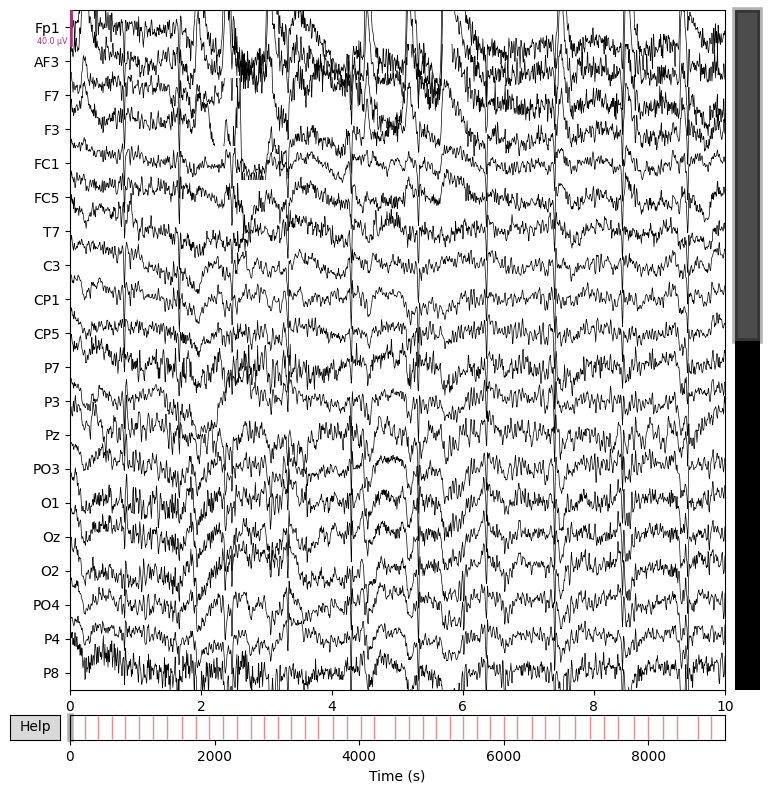

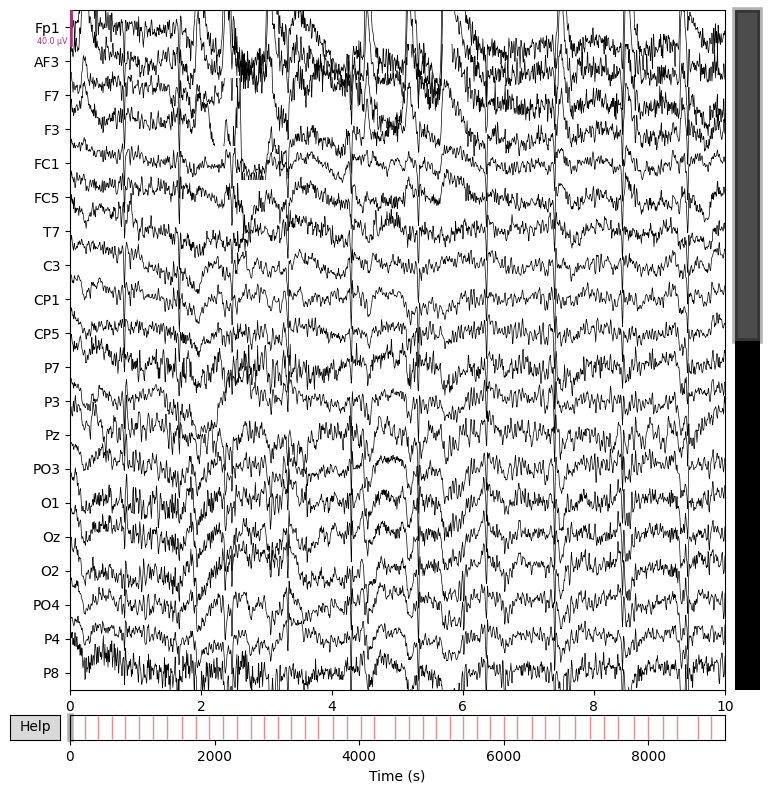

In [ ]:
raw_all.plot()

In [ ]:
raw_all.plot_psd()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().


In [ ]:
raw_all.ch_names

['Fp1',
 'AF3',
 'F7',
 'F3',
 'FC1',
 'FC5',
 'T7',
 'C3',
 'CP1',
 'CP5',
 'P7',
 'P3',
 'Pz',
 'PO3',
 'O1',
 'Oz',
 'O2',
 'PO4',
 'P4',
 'P8',
 'CP6',
 'CP2',
 'C4',
 'T8',
 'FC6',
 'FC2',
 'F4',
 'F8',
 'AF4',
 'Fp2',
 'Fz',
 'Cz',
 'EXG1',
 'EXG2',
 'EXG3',
 'EXG4',
 'EXG5',
 'EXG6',
 'EXG7',
 'EXG8',
 'Status']

#Converting to a dataframe

Processed data is then converted to a panadas dataframe.

In [ ]:
raw_df = raw_all.to_data_frame()

In [ ]:
raw_df.shape

(4640768, 42)

In [ ]:
raw_df

,time,Fp1,AF3,F7,F3,FC1,FC5,T7,C3,CP1,...,Cz,EXG1,EXG2,EXG3,EXG4,EXG5,EXG6,EXG7,EXG8,Status
0,0.000000,2.297020e-14,-4.400163e-13,-5.470232e-13,1.718097e-13,-2.177603e-14,-2.059357e-14,5.067025e-14,-1.955804e-13,-1.180120e-14,...,-1.235899e-13,2.710296e-13,-2.370777e-13,2.191652e-14,1.899432e-13,-1.860094e-13,-1.427009e-12,-1.667154e-14,1.645612e-13,65536.0
1,0.001953,5.157655e+00,2.960146e-01,6.383486e+00,7.715111e+00,4.450812e+00,6.881085e+00,1.165172e+01,1.041788e+01,7.416763e+00,...,4.837304e+00,3.353992e+00,-4.728432e+00,-2.502485e+00,1.134594e+00,-9.975094e+01,-9.900661e+01,4.939284e-01,-4.063535e-01,65536.0
2,0.003906,9.005760e+00,2.215067e+00,1.224277e+01,1.479699e+01,8.755862e+00,1.294874e+01,2.164496e+01,1.937184e+01,1.418274e+01,...,9.437511e+00,6.639152e+00,-7.077249e+00,-4.426161e+00,2.815976e+00,-1.949822e+02,-1.934415e+02,9.019929e-01,-7.753405e-01,65536.0
3,0.005859,1.064827e+01,6.726647e+00,1.719619e+01,2.079928e+01,1.279611e+01,1.765306e+01,2.884299e+01,2.584388e+01,1.978755e+01,...,1.360714e+01,9.784183e+00,-5.514319e+00,-5.227744e+00,5.393489e+00,-2.814731e+02,-2.790774e+02,8.479233e-01,-1.367495e+00,65536.0
4,0.007812,9.880194e+00,1.376199e+01,2.107326e+01,2.555921e+01,1.649132e+01,2.085585e+01,3.295066e+01,2.953929e+01,2.396167e+01,...,1.722545e+01,1.272343e+01,1.463909e-01,-4.525539e+00,8.872119e+00,-3.556091e+02,-3.523622e+02,-4.274173e-01,-2.842605e+00,65536.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4640763,9063.990234,1.275216e+01,-1.195427e+01,-1.661698e+01,-2.125263e+01,-2.363053e+01,-2.033985e+01,-2.560129e+00,-2.310461e+01,-2.170174e+01,...,-1.450254e+01,-2.188656e+01,1.041905e+01,-3.869897e+01,2.009560e+01,1.487906e+02,1.510390e+02,-1.423276e+00,-6.032865e+00,0.0
4640764,9063.992188,2.496711e+01,-7.033553e+00,-1.518277e+01,-1.907987e+01,-2.103415e+01,-1.751259e+01,2.083918e+00,-1.996254e+01,-1.896047e+01,...,-1.253309e+01,-2.032259e+01,6.554042e+00,-2.372562e+01,1.696559e+01,1.121950e+02,1.143914e+02,6.905034e+00,1.926441e+00,0.0
4640765,9063.994141,2.616827e+01,-3.343038e+00,-1.160557e+01,-1.447957e+01,-1.592461e+01,-1.291776e+01,3.678563e+00,-1.475983e+01,-1.411485e+01,...,-9.282977e+00,-1.571687e+01,3.508038e+00,-1.135449e+01,1.222196e+01,7.438770e+01,7.615008e+01,9.275934e+00,5.042349e+00,0.0
4640766,9063.996094,1.644580e+01,-1.166709e+00,-6.289279e+00,-7.826511e+00,-8.606982e+00,-6.870641e+00,2.606811e+00,-7.859737e+00,-7.542854e+00,...,-4.950457e+00,-8.575129e+00,1.434554e+00,-3.866394e+00,6.379131e+00,3.690477e+01,3.788836e+01,6.237458e+00,3.802481e+00,0.0


In [ ]:
raw_df.to_csv('dataframe_raw_df.csv')

In [ ]:
# drop channels 42 - Status from dataframe
# Split the signal into segments

import numpy as np
from scipy import signal

raw_df.drop(['Status'], axis=1, inplace=True)
# set segment length and number of segments
seg_length = 4096
n_segments = len(raw_df) // seg_length

# split dataframe into segments
df_segments = [raw_df.iloc[i*seg_length:(i+1)*seg_length] for i in range(n_segments)]

In [ ]:
# drop channels 42 - Status from dataframe
# Split the signal into segments

import numpy as np
from scipy import signal

#combined_df.drop(['Status'], axis=1, inplace=True)
# set segment length and number of segments
seg_length = 4096
n_segments = len(combined_df) // seg_length

# split dataframe into segments
df_segments1 = [combined_df.iloc[i*seg_length:(i+1)*seg_length] for i in range(n_segments)]

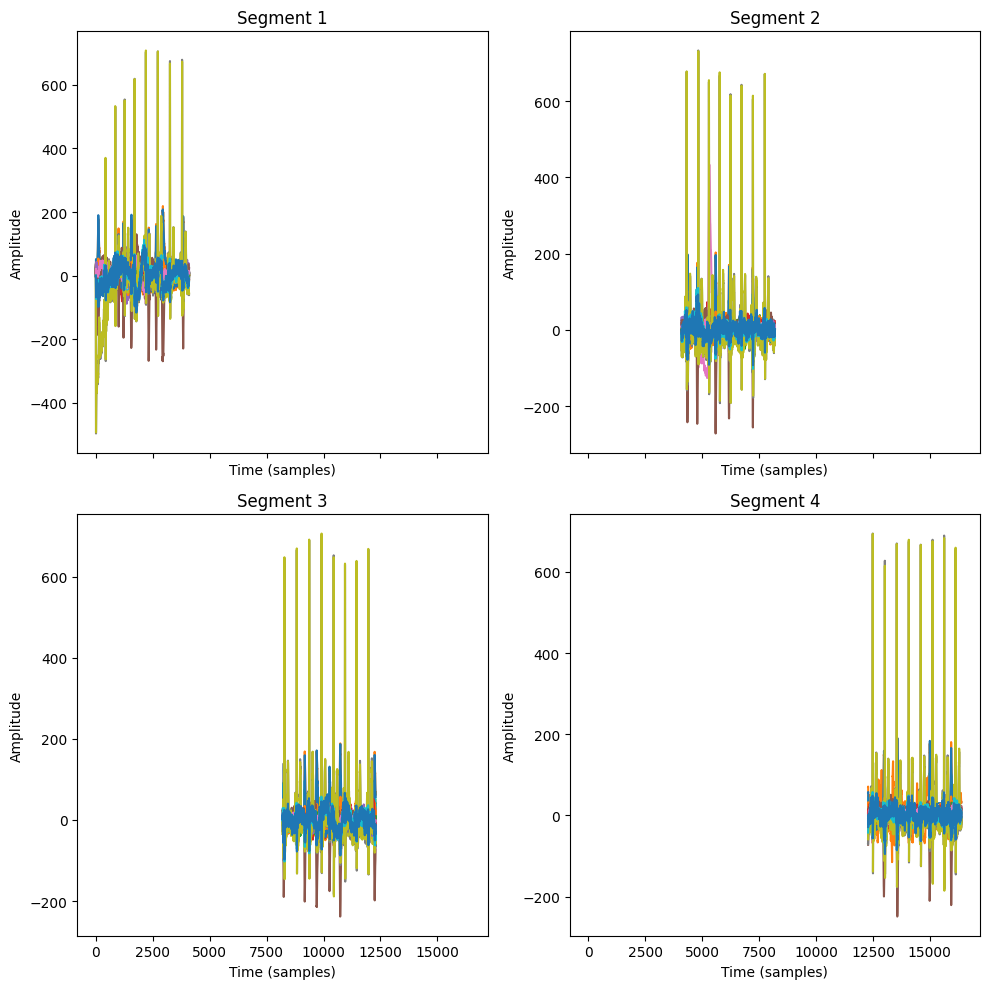

In [ ]:
# Plot the first two segments
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=True)
for i, ax in enumerate(axes.flatten()):
    segment = df_segments[i]
    ax.plot(segment)
    ax.set_title(f"Segment {i+1}")
    ax.set_xlabel('Time (samples)')
    ax.set_ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [ ]:
import pywt
# Create DWT object
wavelet = 'db4'
level = 4
# Apply DWT to each segment
dwt_coefficients1 = []
for i in range(n_segments):
    segment = df_segments1[i]
    coeffs1 = pywt.wavedec(segment, wavelet=wavelet, level=level)
    dwt_coefficients1.append(coeffs)

In [ ]:
# Create DWT object
wavelet = 'db4'
level = 4
# Apply DWT to each segment
dwt_coefficients = []
for i in range(n_segments):
    segment = df_segments[i]
    coeffs = pywt.wavedec(segment, wavelet=wavelet, level=level)
    dwt_coefficients.append(coeffs)

In [ ]:
# Plot the DWT coefficients
import matplotlib.pyplot as plt

# Plot DWT coefficients for each segment
fig, axes = plt.subplots(2, figsize=(12, 12), sharex=True)

for i in range(2):
    coeffs = dwt_coefficients[i]
    for j, c in enumerate(coeffs):
        axes[i].plot(c, label=f'Level {j}')
    axes[i].set_title(f'Segment {i}')
    axes[i].legend()
    axes[i].set_xlabel('Sample number')
    axes[i].set_ylabel('Coefficient value')

plt.tight_layout()    
plt.show()

In [ ]:
mode = 'symmetric'
reconstructed_signal = pywt.waverec(coeffs, wavelet=wavelet, mode=mode)

In [ ]:
reconstructed_signal.shape

(4096, 42)

In [ ]:
# Plot the completed signal
plt.plot(reconstructed_signal)
plt.title('reconstructed Signal')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()

In [ ]:
print(raw_df.columns)

In [ ]:
print(raw_df.iloc[0])

#Feature Extraction 

In [ ]:
%%capture
!pip install entropy
!pip install -U scikit-learn
!pip install frnn
!pip install tkeo
!pip install nolds

In [ ]:
import sklearn
import nolds
import pandas as pd
import numpy as np
import pywt
import entropy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Calculate TShEn and ShEn for each segment
tshen_features = []
shen_features = []
for segment in reconstructed_signal:
#   tshen = tkeo_shannon_entropy(segment)
    shen = nolds.sampen(segment)
    shen_features.append(shen)
    #Transform the signal values according to Equation (8)
    tstr = np.zeros_like(segment)
    tstr[segment > 1] = 1
    tstr[segment < 0] = 0
    tstr[(segment >= 0) & (segment <= 1)] = segment[(segment >= 0) & (segment <= 1)]
    tstr = (255 * tstr).astype(int)
    #Calculate transformed Shannon entropy
    tshen = nolds.sampen(tstr)
    tshen_features.append(tshen)
    

# Combine features into a feature matrix
features = np.column_stack((tshen_features, shen_features))


In [ ]:
np.save('/drive/MyDrive/Computational Neuroscience/PD_Data/features.npy', features)

In [ ]:
print (tshen_features)

In [ ]:
print(shen_features)

In [ ]:
import os
import pyedflib
import pandas as pd

data_dir = '/drive/MyDrive/Computational Neuroscience/PD_Data/Healthy'
healthy_data = []
pd_data = []

for file_name in os.listdir(data_dir):
    if file_name.endswith('.bdf'):
        file_path = os.path.join(data_dir, file_name)
        f = pyedflib.EdfReader(file_path)
        n_channels = f.signals_in_file
        channel_labels = f.getSignalLabels()
        signal_freq = f.getSampleFrequency(0)
        signal_duration = f.getFileDuration()
        eeg_data = []
        for i in range(n_channels):
            channel_data = f.readSignal(i)
            eeg_data.append(channel_data)
        eeg_df = pd.DataFrame(eeg_data).T
        eeg_df.columns = channel_labels
        # Assign labels based on file name or metadata
        if 'hc' in file_name:
            eeg_df['label'] = '0'
            healthy_data.append(eeg_df)
        elif 'pd' in file_name:
            eeg_df['label'] = '1'
            pd_data.append(eeg_df)
        f.close()

# Combine all healthy and pd data into two separate dataframes
healthy_df = pd.concat(healthy_data, ignore_index=True)
pd_df = pd.concat(pd_data, ignore_index=True)


In [ ]:
pd_df.columns


Index(['Fp1', 'AF3', 'F7', 'F3', 'FC1', 'FC5', 'T7', 'C3', 'CP1', 'CP5', 'P7',
       'P3', 'Pz', 'PO3', 'O1', 'Oz', 'O2', 'PO4', 'P4', 'P8', 'CP6', 'CP2',
       'C4', 'T8', 'FC6', 'FC2', 'F4', 'F8', 'AF4', 'Fp2', 'Fz', 'Cz', 'EXG1',
       'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'Status',
       'label'],
      dtype='object')

In [ ]:
pd_df.shape

(3071488, 42)

In [ ]:
# Concatenate the datasets
combined_df = pd.concat([healthy_df, pd_df], axis=0)

# Extract the labels as a separate array
labels = combined_df['label'].values

In [ ]:
import numpy as np
np.save('/drive/MyDrive/Computational Neuroscience/PD_Data/labels.npy', labels)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted
import numpy as np

class FRNN(BaseEstimator, ClassifierMixin):
    def __init__(self, k=1, alpha_cut=0.5):
        self.k = k
        self.alpha_cut = alpha_cut
    
    def fit(self, X, y):
        X, y = check_X_y(X, y)
        self.classes_ = np.unique(y)
        self.classifiers_ = {}
        for c in self.classes_:
            c_index = np.where(y == c)
            X_c = X[c_index]
            fuzzy_labels = self._fuzzy_membership(X_c)
            self.classifiers_[c] = KNeighborsClassifier(n_neighbors=self.k)
            self.classifiers_[c].fit(fuzzy_labels, y[c_index])
        return self
    
    def predict(self, X):
        check_is_fitted(self)
        X = check_array(X)
        predictions = np.zeros((X.shape[0], len(self.classes_)))
        for i, c in enumerate(self.classes_):
            fuzzy_labels = self._fuzzy_membership(X)
            predictions[:, i] = self.classifiers_[c].predict_proba(fuzzy_labels)[:, 1]
        return self.classes_[np.argmax(predictions, axis=1)]
    
    def _fuzzy_membership(self, X):
        n_samples = X.shape[0]
        fuzzy_labels = np.zeros((n_samples, len(self.classes_)))
        for i, c in enumerate(self.classes_):
            class_distances = np.linalg.norm(X - np.mean(X[y==c], axis=0), axis=1)
            max_distance = np.max(class_distances)
            fuzzy_labels[:, i] = np.exp(-((class_distances / max_distance) ** 2) / (self.alpha_cut ** 2))
        return fuzzy_labels


In [ ]:
features = np.load('/drive/MyDrive/Computational Neuroscience/PD_Data/features.npy')


In [ ]:
print(features)

[[ 0.64535652 -0.        ]
 [ 0.4029557  -0.        ]
 [ 0.4105029  -0.        ]
 ...
 [ 0.54308649 -0.        ]
 [ 0.55710638 -0.        ]
 [-0.         -0.        ]]


In [ ]:
features.shape

(4096, 2)

In [ ]:
labels.shape

(4640768,)

In [ ]:
labels = np.load('/drive/MyDrive/Computational Neuroscience/PD_Data/labels.npy')

In [ ]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Extract features from training set
shen_features_train = shen(X_train)
tshen_features_train = tshen(X_train)

# Train FRNN model
frnn_model = FRNN()
frnn_model.fit(shen_features_train, y_train)  # using Shen features
# or
frnn_model.fit(tshen_features_train, y_train)  # using TShen features

# Extract features from testing set
shen_features_test = shen(X_test)
tshen_features_test = tshen(X_test)

# Predict labels of testing set using trained FRNN model
y_pred_shen = frnn_model.predict(shen_features_test)  # using Shen features
# or
y_pred_tshen = frnn_model.predict(tshen_features_test)  # using TShen features

# Evaluate performance of FRNN model on testing set
accuracy_shen = accuracy_score(y_test, y_pred_shen)  # using Shen features
# or
accuracy_tshen = accuracy_score(y_test, y_pred_tshen)  # using TShen features
